## Heart Disease Machine Learning Capstone Project

### Ryan Johnson

# Initial Imports

In [1]:
import numpy as np                 # For doing math, esp. with arrays and matrices
import pandas as pd                # For data analysis and manipulations of dataframes
import matplotlib.pyplot as plt    # For visualizations
%matplotlib inline        
import warnings
warnings.filterwarnings('ignore', message = 'DataFrame is highly fragmented.*') #For eliminating the error message

## About the Data

From the CDC website:

The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states
in the United States and participating US territories and the Centers for Disease Control and Prevention
(CDC). The BRFSS is administered and supported by CDC's Population Health Surveillance Branch, under
the Division of Population Health at CDC’s National Center for Chronic Disease Prevention and Health
Promotion. The BRFSS is a system of ongoing health-related telephone surveys that collect data on
health-related risk behaviors, chronic health conditions, health-care access, and use of preventive
services from the noninstitutionalized adult population (≥ 18 years) residing in the United States and
participating areas. 

### Sources:

##### Gender Differences: https://give.brighamandwomens.org/7-differences-between-men-and-women/#:~:text=Men%20and%20women%20also%20have,O'Donoghue.
##### Heart Disease Facts: https://www.cdc.gov/heart-disease/data-research/facts-stats/index.html#:~:text=Heart%20disease%20in%20the%20United%20States&text=Heart%20disease%20is%20the%20leading,every%205%20deaths.12
##### 2023 BRFSS Data: https://www.cdc.gov/brfss/annual_data/annual_data.htm

## Purpose of this Analysis

Develop a model to predict which patients are at a higher risk of heart disease. The disease can manifest itself in different ways between men and women. Thus, this analysis will develop 3 models: 1) An overall model, 2) A Female Model, 3) A Male Model.

## Variables

### Target Variable

**Heart_Disease** (CVDCRHD4) : Ever told you had angina or coronary heart disease?


### Demographic Variables

**Age** (_AGEG5YR) : 14-level age category

**Sex** (SEXVAR) : Sex of respondent (Male or Female)

**Race** (_RACEGR3) : 5-level race/ethnicity category

**Education** (_EDUCAG) : Level of education completed

**Income** (INCOME3) : What is your annual household income?

**Married** (MARITAL) : What is your marital status?


### Behavioral Variables

**Smoker** (SMOKE100) : Have you smoked 100 cigarettes in your life?

**Marijuana** (MARJSMOK) : During the past 30 days, did you smoke it (for example, in a joint, bong, pipe, or blunt)?

**Activity** (_TOTINDA) :  Adults who reported doing physical activity or exercise during th epast 30 days other than their regular job.

**Alcohol** (_RFDRHV8) :  Are you a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks a week)?


### Medical History and Health Status Variables

**High_BP** (BPHIGH6) : Have you ever been told by a doctor, nurse or other health professional that you have high blood pressure? 

**High_Chol** (TOLDHI3) : Have you ever been told by a doctor, nurse or other health professional that your cholesterol is high?

**Diabetes** (DIABETE4) : Have you ever been told you had diabetes?

**BMI** (_BMI5) : What is your Body Mass Index?

**Stroke** (CVDSTRK3) : Have you ever been told you had a stroke?

**General_Health** (GENHLTH) : How would you rate your general health?

**Physical_Health** (PHYSHLTH) : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

**Mental_Health** (MENTHLTH) :  Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?


### Healthcare Variables

**Health_Insurance** (_HLTHPL1) : Do you have some form of insurance?

**Checkup** (CHECKUP1) : About how long has it been since you last visited a doctor for a routine checkup?

### Socioeconomic Variables

**Employed** (EMPLOY1) : What is your current employment status?

**State** (_STATE) : What state do you live in?


### Psychosocial Variables

**Stress** (SDHSTRE1) :  Within the last 30 days, how often have you felt this kind of stress?

**Depression** (ADDEPEV3) : Have you ever been told you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?


# Initial Data Import

In [2]:
df = pd.read_sas('BRFSS2023.xpt', format = 'xport') #loading in our dataset

df = df.copy() #making a copy of our dataframe to improve performance


In [3]:
df.shape  #finding the shape of our dataframe

(433323, 350)

In [4]:
#we will grab the columns to use for this analysis
brfss23 = df[['_AGEG5YR', 
           'SEXVAR', 
           '_RACEGR3', 
           '_EDUCAG', 
           'INCOME3', 
           'MARITAL', 
           'SMOKE100', 
           'MARJSMOK', 
           '_TOTINDA', 
           '_RFDRHV8', 
           'BPHIGH6', 
           'TOLDHI3', 
           'DIABETE4', 
           '_BMI5',  
           'CVDCRHD4', 
           'CVDSTRK3', 
           'GENHLTH',
            'PHYSHLTH',
            'MENTHLTH',
            '_HLTHPL1',
            'CHECKUP1',
            'EMPLOY1',
            '_STATE', 
            'SDHSTRE1',
            'ADDEPEV3']]


In [5]:
brfss23.shape #gets the shape of our dataframe

(433323, 25)

In [6]:
#renaming our columns to be more interpretable
brfss23 = brfss23.rename(columns = {'_AGEG5YR' : 'Age' , 
           'SEXVAR' : 'Sex', 
           '_RACEGR3' : 'Race', 
           '_EDUCAG' : 'Education', 
           'INCOME3' : 'Income' , 
           'MARITAL' : 'Married', 
           'SMOKE100' : 'Smoker', 
           'MARJSMOK' : 'Marijuana' , 
           '_TOTINDA' : 'Activity', 
           '_RFDRHV8' : 'Alcohol', 
           'BPHIGH6' : 'High_BP' , 
           'TOLDHI3' : 'High_Chol', 
           'DIABETE4' : 'Diabetes', 
           '_BMI5' : 'BMI',  
           'CVDCRHD4' : 'Heart_Disease', 
           'CVDSTRK3' : 'Stroke', 
           'GENHLTH' : 'General_Health',
            'PHYSHLTH' : 'Physical_Health' ,
            'MENTHLTH' : 'Mental_Health',
            '_HLTHPL1' : 'Health_Insurance',
            'CHECKUP1' : 'Checkup',
            'EMPLOY1' : 'Employed',
            '_STATE' : 'State' , 
            'SDHSTRE1' : 'Stress' ,
            'ADDEPEV3' : 'Depression' })

In [7]:
#lets take a look at the data
brfss23.head()

,Age,Sex,Race,Education,Income,Married,Smoker,Marijuana,Activity,Alcohol,...,Stroke,General_Health,Physical_Health,Mental_Health,Health_Insurance,Checkup,Employed,State,Stress,Depression
0,13.0,2.0,1.0,3.0,99.0,1.0,2.0,NaN,2.0,1.0,...,2.0,2.0,88.0,88.0,1.0,2.0,7.0,1.0,5.0,2.0
1,13.0,2.0,1.0,3.0,99.0,2.0,2.0,NaN,1.0,1.0,...,2.0,2.0,88.0,88.0,1.0,2.0,7.0,1.0,5.0,1.0
2,13.0,2.0,2.0,2.0,2.0,3.0,1.0,NaN,1.0,1.0,...,2.0,4.0,6.0,2.0,1.0,1.0,7.0,1.0,3.0,2.0
3,12.0,2.0,1.0,3.0,99.0,1.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,88.0,1.0,3.0,7.0,1.0,5.0,1.0
4,12.0,2.0,1.0,3.0,7.0,3.0,2.0,NaN,1.0,1.0,...,2.0,4.0,88.0,88.0,1.0,1.0,8.0,1.0,2.0,1.0


In [8]:
#let's investigate where the null values in our dataset are
null_counts = brfss23.isnull().sum()
null_counts_filtered = null_counts[null_counts > 1]
print(null_counts_filtered)

Race                   86
Income               8075
Married                 7
Smoker              19674
Marijuana          421883
High_BP                 3
High_Chol           51812
Diabetes                5
BMI                 40535
Heart_Disease           3
Stroke                  4
General_Health          4
Physical_Health         3
Mental_Health           3
Checkup                 2
Employed             2968
Stress             209830
Depression              3
dtype: int64


In [9]:
#removing the null values
brfss23 = brfss23.dropna()
brfss23

,Age,Sex,Race,Education,Income,Married,Smoker,Marijuana,Activity,Alcohol,...,Stroke,General_Health,Physical_Health,Mental_Health,Health_Insurance,Checkup,Employed,State,Stress,Depression
48035,9.0,2.0,1.0,4.0,99.0,1.0,2.0,2.0,1.0,2.0,...,2.0,3.0,88.0,4.0,1.0,4.0,2.0,9.0,5.0,2.0
48037,6.0,2.0,1.0,4.0,77.0,1.0,2.0,1.0,1.0,1.0,...,2.0,3.0,88.0,2.0,1.0,1.0,2.0,9.0,5.0,2.0
48054,11.0,1.0,1.0,3.0,7.0,1.0,1.0,2.0,1.0,1.0,...,2.0,3.0,88.0,88.0,1.0,1.0,7.0,9.0,4.0,2.0
48058,6.0,2.0,1.0,4.0,10.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,5.0,88.0,1.0,1.0,1.0,9.0,5.0,2.0
48066,9.0,1.0,1.0,4.0,11.0,1.0,1.0,1.0,2.0,1.0,...,2.0,3.0,3.0,3.0,1.0,2.0,1.0,9.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376874,4.0,2.0,2.0,3.0,7.0,1.0,1.0,1.0,2.0,2.0,...,2.0,4.0,88.0,88.0,1.0,2.0,1.0,51.0,3.0,2.0
376880,2.0,1.0,9.0,3.0,9.0,5.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,30.0,2.0,4.0,1.0,51.0,3.0,2.0
376886,10.0,1.0,1.0,2.0,5.0,1.0,2.0,1.0,1.0,9.0,...,2.0,3.0,88.0,88.0,1.0,1.0,2.0,51.0,1.0,2.0
376893,5.0,2.0,4.0,3.0,8.0,4.0,1.0,1.0,1.0,1.0,...,2.0,2.0,88.0,5.0,1.0,1.0,1.0,51.0,4.0,1.0


## Variable Cleaning

In [10]:
#Age (_AGEG5YR)
# ordinal column. 1 is 18-24. Has 13 categories, with 5 year increments. 13 is 80+. 
# remove 14 because it is don't know or missing
brfss23 = brfss23[brfss23.Age != 14]
brfss23.Age.unique()

array([ 9.,  6., 11., 10.,  7.,  5.,  8.,  2., 12.,  4., 13.,  1.,  3.])

In [11]:
#Sex (SEXVAR)
# binary male or female
# change 2 to 0 (female as 0). Male is 1
brfss23['Sex'] = brfss23['Sex'].replace({2:0})
brfss23.Sex.unique()

C:\Users\rjohn\AppData\Local\Temp\ipykernel_15956\4227620282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss23['Sex'] = brfss23['Sex'].replace({2:0})


array([0., 1.])

In [12]:
#Race (_RACEGR3)
#5 level racial identification
#remove 9 because it is refused or don't know
brfss23 = brfss23[brfss23.Race != 9]
brfss23.Race.unique()

array([1., 4., 3., 5., 2.])

In [13]:
#Education (_EDUCAG)
#4 level identification from 1 being did not graduate High School to 4 Graduated from College or Technical School
#remove 9 for don't know or msising
brfss23 = brfss23[brfss23.Education != 9]
brfss23.Education.unique()

array([4., 3., 2., 1.])

In [14]:
#Income (INCOME3)
#ordinal variable with 1 being less than $10,000 all the way up to 11 being $200,000 or more
# Remove 77 and 99 for don't know and refused
brfss23 = brfss23[brfss23.Income != 77]
brfss23 = brfss23[brfss23.Income != 99]
brfss23.Income.unique()

array([ 7., 10., 11.,  9.,  6.,  4.,  5.,  8.,  2.,  1.,  3.])

In [15]:
#Married (MARITAL)
#Changed from a 6 level system to just binary of married (1) or not-married (0)
#remove 9 because they refused
brfss23['Married'] = brfss23['Married'].replace({2:0, 3:0, 4:0, 5:0, 6:0})
brfss23 = brfss23[brfss23.Married != 9]
brfss23.Married.unique()

array([1., 0.])

In [16]:
#Smoker (SMOKE100)
#1 have smoked 100 days in life, 0 have not
#remove 7 and 9 which were don't know or refused
brfss23['Smoker'] = brfss23['Smoker'].replace({2:0})
brfss23 = brfss23[brfss23.Smoker != 7]
brfss23 = brfss23[brfss23.Smoker != 9]
brfss23.Smoker.unique()

array([1., 0.])

In [17]:
#Marijuana (MARJSMOK)
#1 being Yes smoked marijuana in the past 30 days, 0 being no
#remove 7 and 9 which were don't know or refused
brfss23['Marijuana'] = brfss23['Marijuana'].replace({2:0})
brfss23 = brfss23[brfss23.Marijuana != 7]
brfss23 = brfss23[brfss23.Marijuana != 9]
brfss23.Marijuana.unique()

array([0., 1.])

In [18]:
#Activity (_TOTINDA)
#1 being had physical activity, 0 being no physical acitivity (replace 2 with 0)
#remove 9 don't know, not sure or missing
brfss23['Activity'] = brfss23['Activity'].replace({2:0})
brfss23 = brfss23[brfss23.Activity != 9]
brfss23.Activity.unique()

array([1., 0.])

In [19]:
#Alcohol (_RFDRHV8)
#remove 9 for don't know or missing
#1 being heavy drinker (replace 2 with 1), 0 being not a heavy drinker (replace 1 with 0)
brfss23['Alcohol'] = brfss23['Alcohol'].replace({1:0})
brfss23['Alcohol'] = brfss23['Alcohol'].replace({2:1})
brfss23 = brfss23[brfss23.Alcohol != 9]
brfss23.Alcohol.unique()

array([0., 1.])

In [20]:
#High_BP (BPHIGH6)
#Change 3 to 0 so it represents No high blood pressure and 2 and 4 to 1 so it represents high blood pressure
#remove 7 and 9 for don't know or refuse
brfss23['High_BP'] = brfss23['High_BP'].replace({3:0, 2:1, 4:1})
brfss23 = brfss23[brfss23.High_BP != 7]
brfss23 = brfss23[brfss23.High_BP != 9]
brfss23.High_BP.unique()

array([1., 0.])

In [21]:
#High_Chol (TOLDHI3)
#1 for yes high cholesterol 0 for no (change 2 to 0)
#remove 7 and 9 for don't know or refused
brfss23['High_Chol'] = brfss23['High_Chol'].replace({2:0})
brfss23 = brfss23[brfss23.High_Chol != 7]
brfss23 = brfss23[brfss23.High_Chol != 9]
brfss23.High_Chol.unique()

array([1., 0.])

In [22]:
#Diabetes (DIABETE4)
# going to make this binary. 0 is for no diabetes, only during pregnancy,pre-diabetes or borderline diabetes, 1 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss23['Diabetes'] = brfss23['Diabetes'].replace({2:0, 3:0, 1:1, 4:0})
brfss23 = brfss23[brfss23.Diabetes != 7]
brfss23 = brfss23[brfss23.Diabetes != 9]
brfss23.Diabetes.unique()

array([1., 0.])

In [23]:
# BMI (_BMI5) 
#no reductions just note that these are BMI * 100. We will divide by 100 to get accurate BMI scores
#rounding to zero decimal places to make it easier for the machine learning models
brfss23['BMI'] = brfss23['BMI'].div(100).round(0)
brfss23.BMI.unique()

array([34., 27., 24., 28., 23., 30., 33., 26., 31., 29., 25., 38., 37.,
       20., 32., 49., 22., 21., 40., 14., 15., 46., 36., 44., 39., 42.,
       47., 19., 35., 41., 17., 60., 52., 50., 55., 53., 43., 18., 45.,
       69., 16., 72., 58., 48., 51., 54., 57., 61., 66., 63., 56., 62.,
       75., 68.])

In [24]:
#Heart_Disease (CVDCRHD4)
#changing No from 2 to 0
#remove 7 and 9 for don't know or refused
brfss23['Heart_Disease'] = brfss23['Heart_Disease'].replace({2:0})
brfss23 = brfss23[brfss23.Heart_Disease != 7]
brfss23 = brfss23[brfss23.Heart_Disease != 9]
brfss23.Heart_Disease.unique()

array([0., 1.])

In [25]:
#Stroke (CVDSTRK3)
#changing No from 2 to 0
#remove 7 and 9 for don't know or refused
brfss23['Stroke'] = brfss23['Stroke'].replace({2:0})
brfss23 = brfss23[brfss23.Stroke != 7]
brfss23 = brfss23[brfss23.Stroke != 9]
brfss23.Stroke.unique()

array([0., 1.])

In [26]:
#General_Health (GENHLTH)
#1-5 scale with 1 being excellent 5 being poor
#remove 7 and 9 for don't know or refused
brfss23 = brfss23[brfss23.General_Health != 7]
brfss23 = brfss23[brfss23.General_Health != 9]
brfss23.General_Health.unique()

array([3., 1., 4., 5., 2.])

In [27]:
#Physical_Health (PHYSHLTH)
#1-30 days physical health has NOT been good
#change None from 88 to 0
#remove 77 and 99 for don't know or refused
brfss23['Physical_Health'] = brfss23['Physical_Health'].replace({88:0})
brfss23 = brfss23[brfss23.Physical_Health != 77]
brfss23 = brfss23[brfss23.Physical_Health != 99]
brfss23.Physical_Health.unique()

array([ 0.,  5.,  3.,  4., 15., 30., 27.,  2., 10.,  1., 25., 20., 14.,
        7.,  6., 28., 11., 21.,  8., 18., 12., 29.,  9., 16., 17., 26.,
       13., 22., 24.])

In [28]:
#Mental_Health (MENTHLTH)
#1-30 days mental health has NOT been good
#change None from 88 to 0
#remove 77 and 99 for don't know or refused
brfss23['Mental_Health'] = brfss23['Mental_Health'].replace({88:0})
brfss23 = brfss23[brfss23.Mental_Health != 77]
brfss23 = brfss23[brfss23.Mental_Health != 99]
brfss23.Mental_Health.unique()

array([ 0.,  3.,  5.,  1.,  2., 20., 10., 27.,  4., 15., 30.,  7.,  6.,
       28., 23.,  8., 14., 21., 25., 12., 16.,  9., 17., 26., 18., 13.,
       11., 24., 22., 29.])

In [29]:
#Health_Insurance (_HLTHPL1)
#replace 2 to 0 for no health care plan
#remove 7 and 9 for don't know or refused
brfss23['Health_Insurance'] = brfss23['Health_Insurance'].replace({2:0})
brfss23 = brfss23[brfss23.Health_Insurance != 7]
brfss23 = brfss23[brfss23.Health_Insurance != 9]
brfss23.Health_Insurance.unique()

array([1., 0.])

In [30]:
#Checkup (CHECKUP1)
#5 levels with 1 being within the past year through 4 being 5+ years, and 8 being never
#change never from 8 to 0
#remove 7 and 9 for don't know or refused
brfss23['Checkup'] = brfss23['Checkup'].replace({8:0})
brfss23 = brfss23[brfss23.Checkup != 7]
brfss23 = brfss23[brfss23.Checkup != 9]
brfss23.Checkup.unique()

array([1., 2., 3., 4., 0.])

In [31]:
#Employed (EMPLOY1)
#remove 9 for refused
#make 2 1 for employed, everything else is 0 for not employed
brfss23['Employed'] = brfss23['Employed'].replace({2:1, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
brfss23 = brfss23[brfss23.Employed != 9]
brfss23.Employed.unique()

array([0., 1.])

In [32]:
#State (_STATE)
#just a listing of states, no manipulation needed

In [33]:
#Stress (SDHSTRE1)
#remove 7 and 9 for don't know or refused
brfss23 = brfss23[brfss23.Stress != 7]
brfss23 = brfss23[brfss23.Stress != 9]
brfss23.Stress.unique()

array([4., 5., 3., 2., 1.])

In [34]:
#Depression (ADDEPEV3)
#binary 1 yes and 2 no
#change 2 to 0 for no
#remove 7 and 9 for don't know or refused
brfss23['Depression'] = brfss23['Depression'].replace({2:0})
brfss23 = brfss23[brfss23.Depression != 7]
brfss23 = brfss23[brfss23.Depression != 9]
brfss23.Depression.unique()

array([0., 1.])

In [35]:
#getting the new shape of our cleaned dataframe
brfss23.shape

(4834, 25)

# Visualizations

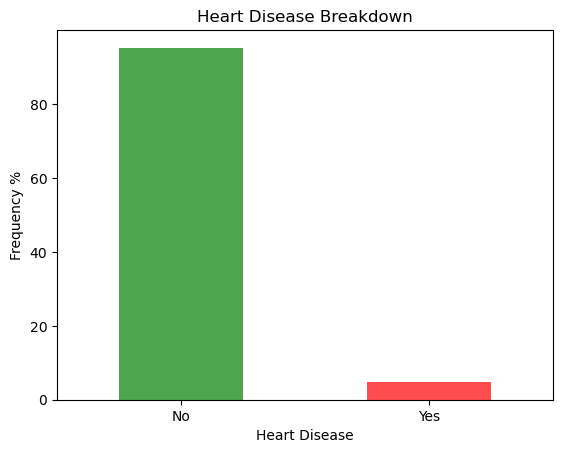

The percent of people without heart disease is 95.22%, while the percent of with with heart disease is 4.78%.


In [36]:
#graphing the percentage of respondents with heart disease

#calculating the frequencies and setting the x axis for labeling
hd_frequency = brfss23['Heart_Disease'].value_counts()
hd_percent = (hd_frequency/hd_frequency.sum())*100
hd_percent = hd_percent.set_axis(['No', 'Yes'])


#graphing our distribution
hd_percent.plot(kind = 'bar', color = ['green', 'red'], alpha = 0.7)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency %')
plt.title('Heart Disease Breakdown')
plt.xticks(rotation = 0)
plt.show()

#describing our distribution
print(f"The percent of people without heart disease is {hd_percent['No'].round(2)}%, while the percent of with with heart disease is {hd_percent['Yes'].round(2)}%.")

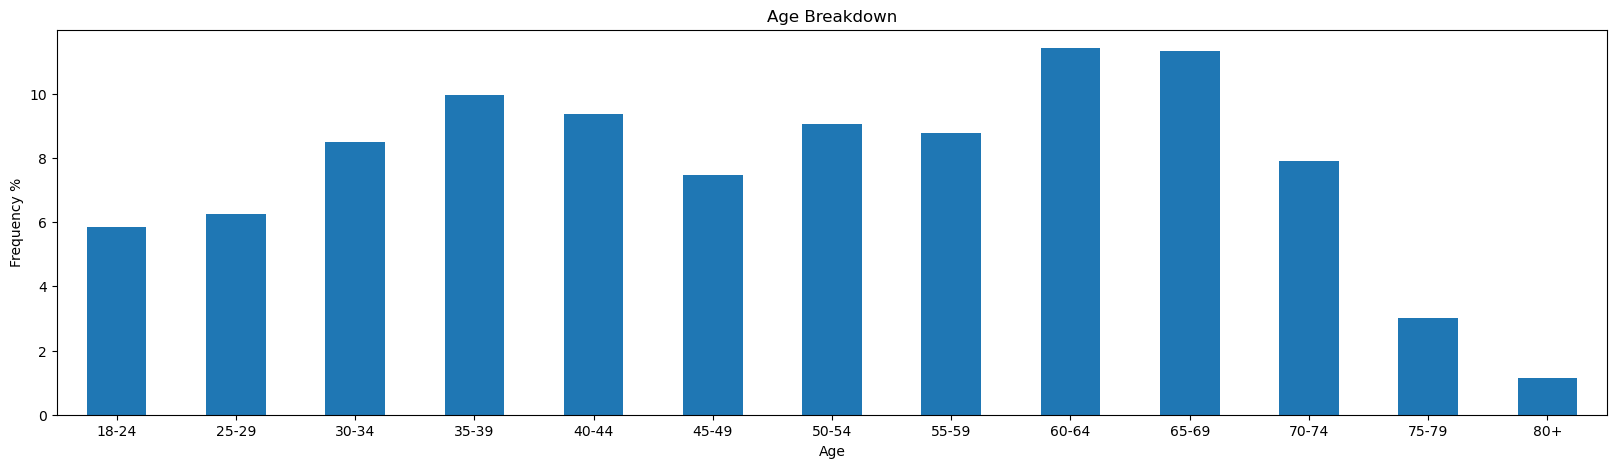

The age distribution is fairly even, with the maximum at age group 60-64 with 11.42% and the minimum at age group 80+ with 1.16%. The mean of the distribution is 7.69%.


In [37]:
#graphing the age distribution

#calculating the frequencies, sorting, and setting the x axis for labeling
age_frequency = brfss23['Age'].value_counts()
age_percent = (age_frequency/age_frequency.sum())*100
age_percent = age_percent.sort_index()
age_percent = age_percent.set_axis(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])

#getting the min, max, and mean values for the distribution
max_value = max(age_percent)
max_index = age_percent.idxmax()
min_value = min(age_percent)
min_index = age_percent.idxmin()
mean_value = age_percent.mean()


#plotting the distribution
plt.figure(figsize=(20,5))
age_percent.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Frequency %')
plt.title('Age Breakdown')
plt.xticks(rotation = 0)
plt.show()

#describing our distribution
print(f"The age distribution is fairly even, with the maximum at age group {max_index} with {round(max_value,2)}% and the minimum at age group {min_index} with {round(min_value,2)}%. The mean of the distribution is {round(mean_value,2)}%.")

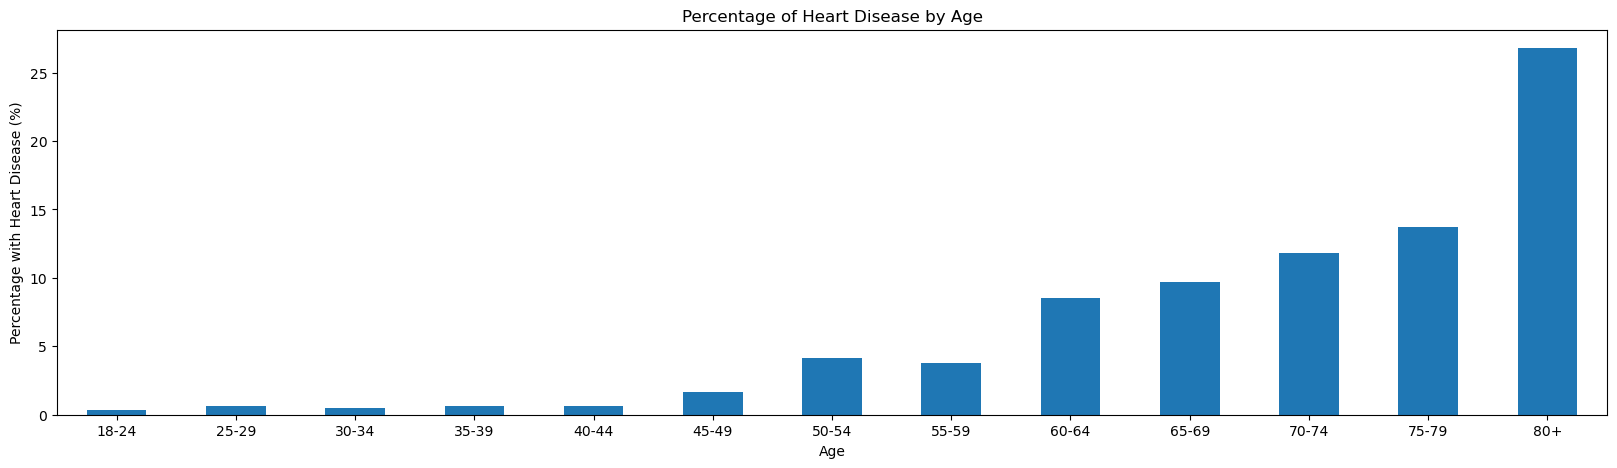

The age range with the highest percent of heart disease is 80+ at 26.79% and the age range with the lowest percentage of heart disease is 18-24 at 0.35%.


In [38]:
#graphing the percent of heart disease per age group

#calculating the frequencies and setting the x axis for labeling
hd_per_age = ( brfss23.groupby('Age')['Heart_Disease'].mean()*100)
hd_per_age = hd_per_age.set_axis(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])

#getting the min, max, and mean values for the distribution
max_value = max(hd_per_age)
max_index = hd_per_age.idxmax()
min_value = min(hd_per_age)
min_index = hd_per_age.idxmin()

#plotting the distribution
plt.figure(figsize=(20,5))
hd_per_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Percentage with Heart Disease (%)')
plt.title('Percentage of Heart Disease by Age')
plt.xticks(rotation=0)
plt.show()

#describing our distribution
print(f"The age range with the highest percent of heart disease is {max_index} at {round(max_value,2)}% and the age range with the lowest percentage of heart disease is {min_index} at {round(min_value,2)}%.")

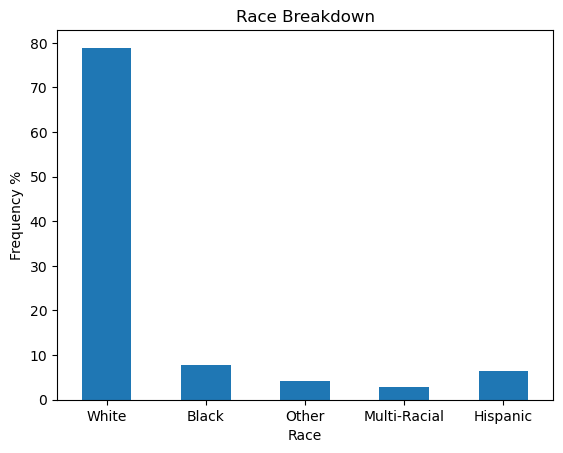

The race distribution is heavily skewed, as the race with the highest frequency is White with 78.9% and race with the minimum frequency is Multi-Racial with 2.75%.


In [39]:
#graphing the racial distribution

#calculating the frequencies, sorting, and setting the x axis for labeling
race_frequency = brfss23['Race'].value_counts()
race_percent = (race_frequency/race_frequency.sum())*100
race_percent = race_percent.sort_index()
race_percent = race_percent.set_axis(['White', 'Black', 'Other', 'Multi-Racial', 'Hispanic'])

#getting the min, max, and mean values for the distribution
max_value = max(race_percent)
max_index = race_percent.idxmax()
min_value = min(race_percent)
min_index = race_percent.idxmin()
mean_value = race_percent.mean()

#plotting the distribution
race_percent.plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Frequency %')
plt.title('Race Breakdown')
plt.xticks(rotation = 0)
plt.show()

#describing our distribution
print(f"The race distribution is heavily skewed, as the race with the highest frequency is {max_index} with {round(max_value,2)}% and race with the minimum frequency is {min_index} with {round(min_value,2)}%.")

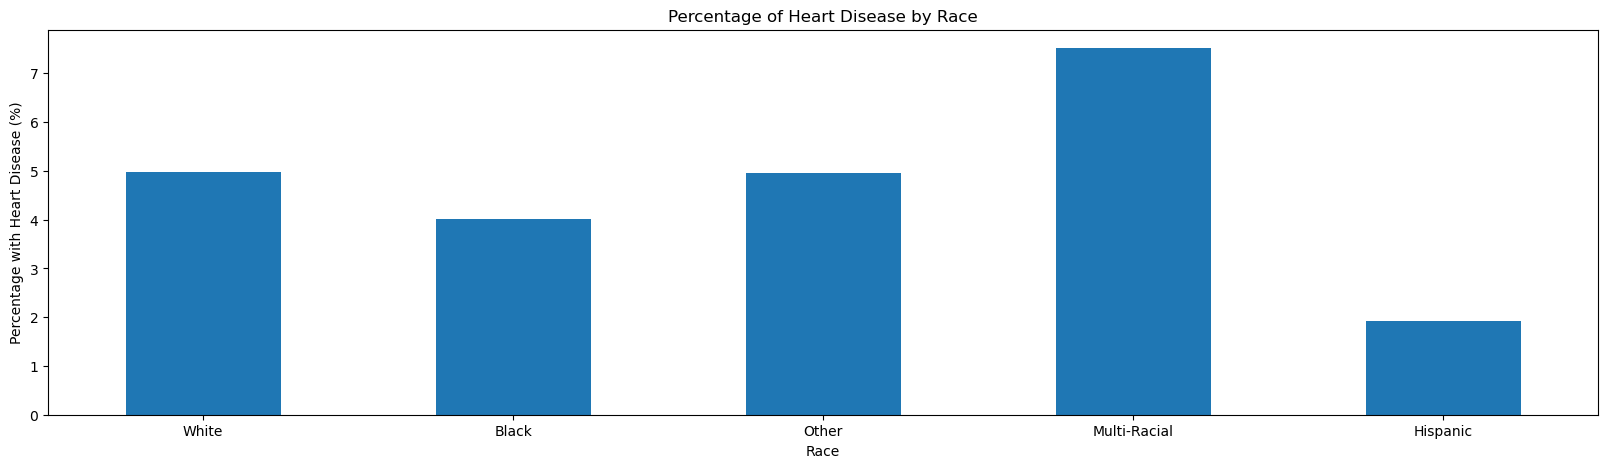

The race with the highest percent of heart disease is Multi-Racial at 7.52% and the race with the lowest percentage of heart disease is Hispanic at 1.93%.


In [40]:
#graphing the percent of heart disease per race

#calculating the frequencies and setting the x axis for labeling
hd_per_race = ( brfss23.groupby('Race')['Heart_Disease'].mean()*100)
hd_per_race = hd_per_race.set_axis(['White', 'Black', 'Other', 'Multi-Racial', 'Hispanic'])

#getting the min, max, and mean values for the distribution
max_value = max(hd_per_race)
max_index = hd_per_race.idxmax()
min_value = min(hd_per_race)
min_index = hd_per_race.idxmin()

#plotting the distribution
plt.figure(figsize=(20,5))
hd_per_race.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Percentage with Heart Disease (%)')
plt.title('Percentage of Heart Disease by Race')
plt.xticks(rotation=0)
plt.show()

#describing our distribution
print(f"The race with the highest percent of heart disease is {max_index} at {round(max_value,2)}% and the race with the lowest percentage of heart disease is {min_index} at {round(min_value,2)}%.")

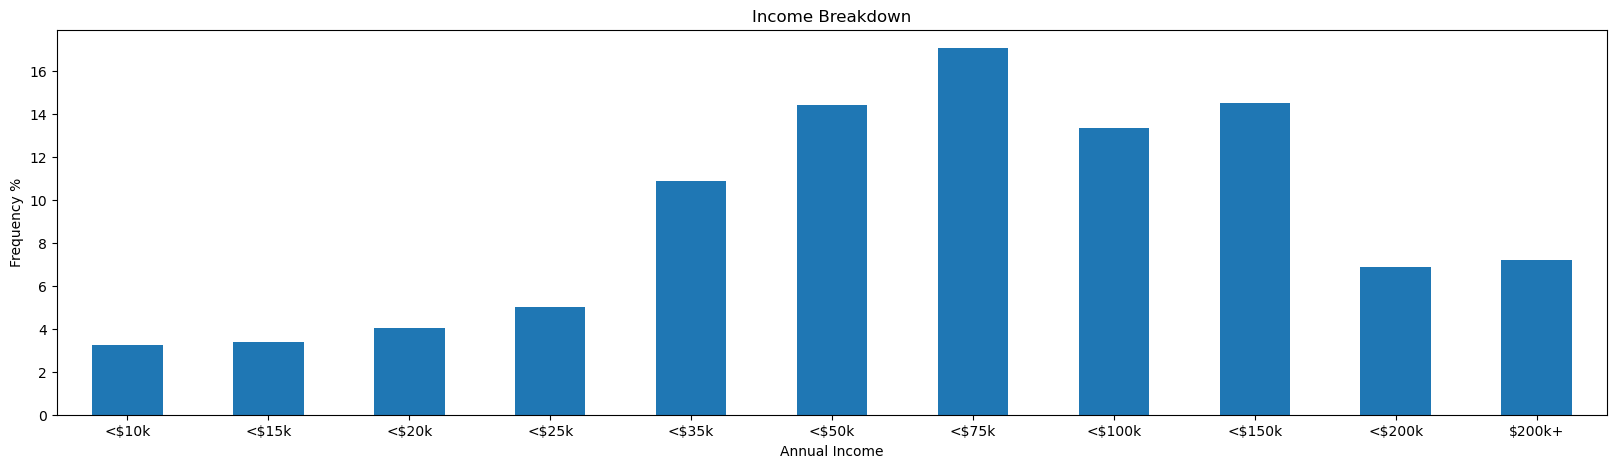

The income distribution is relatively normal, with the maximum frequency of 17.07% at <$75k annually, and the minimum frequency of 3.27% at <$10k annually. The average frequency is 9.09%.


In [41]:
#graphing the income distribution

#calculating the frequencies, sorting, and setting the x axis for labeling
income_frequency = brfss23['Income'].value_counts()
income_percent = (income_frequency/income_frequency.sum())*100
income_percent = income_percent.sort_index()
income_percent = income_percent.set_axis(['<$10k', '<$15k', '<$20k', '<$25k', '<$35k', '<$50k', '<$75k', '<$100k', '<$150k', '<$200k', '$200k+'])

#getting the min, max, and mean values for the distribution
max_value = max(income_percent)
max_index = income_percent.idxmax()
min_value = min(income_percent)
min_index = income_percent.idxmin()
mean_value = income_percent.mean()

#plotting the distribution
plt.figure(figsize=(20,5))
income_percent.plot(kind = 'bar')
plt.xlabel('Annual Income')
plt.ylabel('Frequency %')
plt.title('Income Breakdown')
plt.xticks(rotation = 0)
plt.show()

#describing our distribution
print(f"The income distribution is relatively normal, with the maximum frequency of {round(max_value,2)}% at {max_index} annually, and the minimum frequency of {round(min_value,2)}% at {min_index} annually. The average frequency is {round(mean_value,2)}%.")

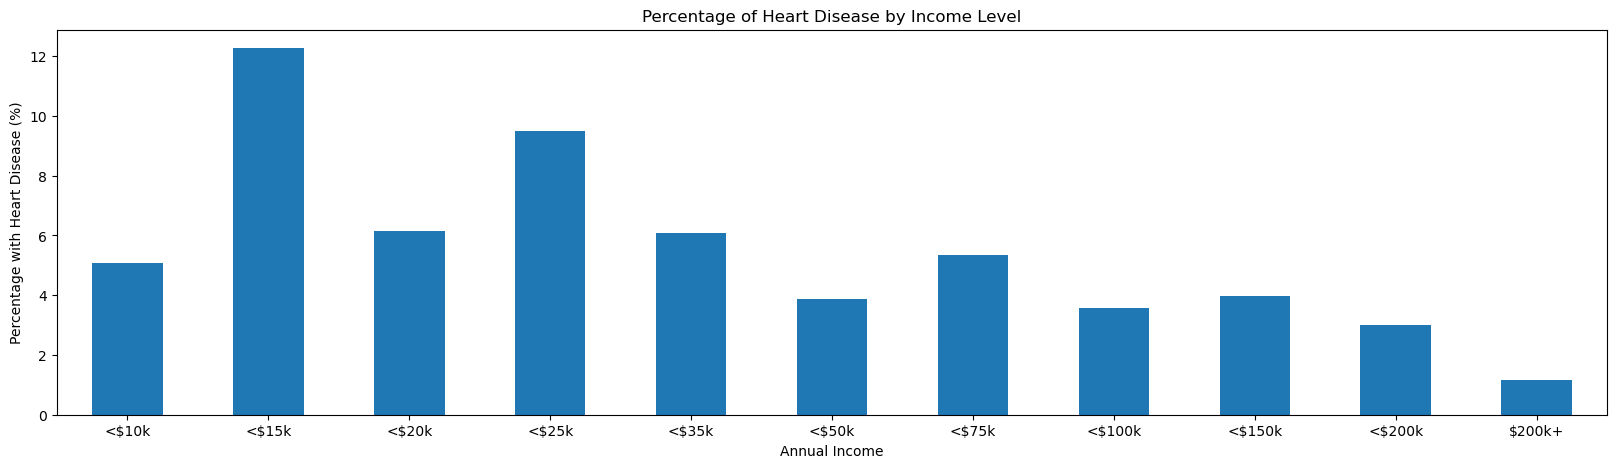

The income level with the highest percent of heart disease is <$15k at 12.27% and the lowest percentage of heart disease is the $200k+ income level at 1.15%.


In [42]:
#graphing the percent of heart disease per income level

#calculating the frequencies and setting the x axis for labeling
hd_per_income = ( brfss23.groupby('Income')['Heart_Disease'].mean()*100)
hd_per_income = hd_per_income.set_axis(['<$10k', '<$15k', '<$20k', '<$25k', '<$35k', '<$50k', '<$75k', '<$100k', '<$150k', '<$200k', '$200k+'])

#getting the min, max, and mean values for the distribution
max_value = max(hd_per_income)
max_index = hd_per_income.idxmax()
min_value = min(hd_per_income)
min_index = hd_per_income.idxmin()

#plotting the distribution
plt.figure(figsize=(20,5))
hd_per_income.plot(kind='bar')
plt.xlabel('Annual Income')
plt.ylabel('Percentage with Heart Disease (%)')
plt.title('Percentage of Heart Disease by Income Level')
plt.xticks(rotation=0)
plt.show()

#describing our distribution
print(f"The income level with the highest percent of heart disease is {max_index} at {round(max_value,2)}% and the lowest percentage of heart disease is the {min_index} income level at {round(min_value,2)}%.")

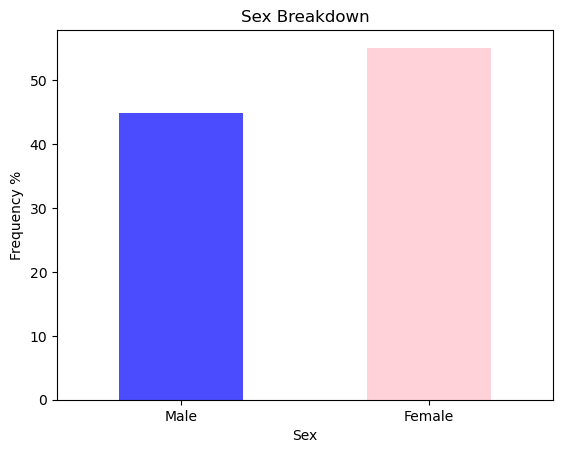

The cleaned dataset is 44.91% male and 55.09% female.


In [43]:
#graphing the sex distribution

#calculating the frequencies, sorting, and setting the x axis for labeling
sex_frequency = brfss23['Sex'].value_counts()
sex_percent = (sex_frequency/sex_frequency.sum())*100
sex_percent = sex_percent.sort_index()
sex_percent = sex_percent.set_axis(['Male', 'Female'])

#plotting the distribution
sex_percent.plot(kind = 'bar', color=['blue', 'pink'], alpha=0.7)
plt.xlabel('Sex')
plt.ylabel('Frequency %')
plt.title('Sex Breakdown')
plt.xticks(rotation = 0)
plt.show()

#describing our distribution
print(f"The cleaned dataset is {sex_percent['Male'].round(2)}% male and {sex_percent['Female'].round(2)}% female.")

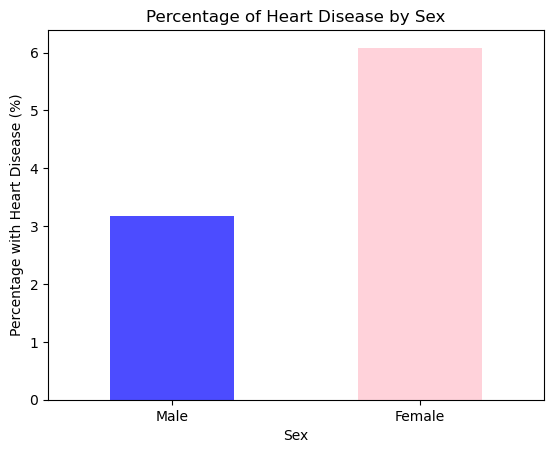

The percent of men with heart disease is 3.18%, while the percent of women with heart disease is 6.08%.


In [44]:
#graphing the percent of heart disease per sex

#calculating the frequencies and setting the x axis for labeling
hd_per_sex = ( brfss23.groupby('Sex')['Heart_Disease'].mean()*100)
hd_per_sex = hd_per_sex.set_axis(['Male', 'Female'])
hd_per_sex.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)

#plotting the distribution
plt.xlabel('Sex')
plt.ylabel('Percentage with Heart Disease (%)')
plt.title('Percentage of Heart Disease by Sex')
plt.xticks(rotation=0)
plt.show()

#describing our distribution
print(f"The percent of men with heart disease is {hd_per_sex['Male'].round(2)}%, while the percent of women with heart disease is {hd_per_sex['Female'].round(2)}%.")

In [45]:
#now let's see which variables have the highest correlation with our target variable Heart_Disease
correlation_matrix = brfss23.corr()
target_corr = correlation_matrix['Heart_Disease'].sort_values(ascending=False)
print(target_corr)

print(f"The highest correlation is Age at {round(target_corr[1],2)}. The values range down through {round(target_corr[len(target_corr)-1],2)}, so there is no feature variable that is highly correlated with our target variable.")

Heart_Disease       1.000000
Age                 0.206057
General_Health      0.176464
High_Chol           0.173643
High_BP             0.169494
Diabetes            0.160951
Physical_Health     0.144271
Stroke              0.118307
Smoker              0.094036
Sex                 0.067741
BMI                 0.039669
Health_Insurance    0.038086
Depression          0.022989
Stress              0.008083
Married             0.007923
Mental_Health       0.006975
State               0.003815
Marijuana          -0.019679
Alcohol            -0.022501
Race               -0.022963
Education          -0.023913
Checkup            -0.061639
Activity           -0.075953
Income             -0.079460
Employed           -0.139604
Name: Heart_Disease, dtype: float64
The highest correlation is Age at 0.21. The values range down through -0.14, so there is no feature variable that is highly correlated with our target variable.


# Machine Learning

In [46]:
#Loading in our machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

## Overall Model

In [71]:
#splitting our variables into features (X) and target (y)

X = brfss23[[col for col in brfss23.columns if col != 'Heart_Disease']]
y = brfss23['Heart_Disease']

#splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#output
print(f"The length of our training datasets is {len(X_train)} and the length of our test datasets is {len(X_test)}.")


The length of our training datasets is 3867 and the length of our test datasets is 967.


In [72]:
#create a list of names for the machine learning algorithms

name = ['Logistic Regression', 
        'Decision Tree',
        'Naive Bayes',
        'Random Forest',
        'K-Nearest Neighbors',
        'SVM',]

#create a list of the classification algorithms

classifications = [LogisticRegression(max_iter = 1000),
              DecisionTreeClassifier(random_state = 42),
              GaussianNB(),
              RandomForestClassifier(random_state = 42),
              KNeighborsClassifier(),
              SVC()]
              

In [73]:
#now let's run them and get the results!

#create a dictionary to store results
results = {}

#loop over the classification algorithms
for clf in classifications:
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #Make predictions
    y_pred = clf.predict(X_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    #store results
    results[clf.__class__.__name__] = accuracy
    
#let's print the accuracy scores
for classifier, accuracy in results.items():
    print(f"{classifier}: {accuracy:.4f}")

LogisticRegression: 0.9452
DecisionTreeClassifier: 0.9080
GaussianNB: 0.8180
RandomForestClassifier: 0.9483
KNeighborsClassifier: 0.9442
SVC: 0.9483


In [74]:
#our models performed very well! let's see what features were the most important to our top classifiers

#find the best classifier, which was the RandomForest
best_classifier_name = max(results, key=results.get)
print(f"The classifier with the highest accuracy is: {best_classifier_name} with an accuracy of {results[best_classifier_name]:.2f}")

#retrieve the best classifier
best_classifier = [clf for clf in classifications if clf.__class__.__name__ == best_classifier_name][0]

#let's see the feature importances
importances = best_classifier.feature_importances_
overall_feature_importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : importances
})


#returning the dataframe
overall_feature_importance_df = overall_feature_importance_df.sort_values(by = 'Importance', ascending = False)
overall_feature_importance_df


The classifier with the highest accuracy is: RandomForestClassifier with an accuracy of 0.95


,Feature,Importance
13,BMI,0.114850
0,Age,0.103638
4,Income,0.082533
21,State,0.082447
15,General_Health,0.065113
16,Physical_Health,0.063892
17,Mental_Health,0.059699
22,Stress,0.055131
3,Education,0.042215
12,Diabetes,0.032029


In [77]:
#describing our results
print(f"In a Random Forest Classifier model, the feature importance scores add up to 1. Typically, features with a score of .1 or 10% are seen as strong features.")
print(f"In this model, we had 2 variable above 10%. The most important feature, {overall_feature_importance_df['Feature'].iloc[0]}, had a value of {round(overall_feature_importance_df['Importance'].iloc[0] *100,2)}%. The other strong feature was {overall_feature_importance_df['Feature'].iloc[1]}, which had a value of {round(overall_feature_importance_df['Importance'].iloc[1] *100,2)}%.") 

In a Random Forest Classifier model, the feature importance scores add up to 1. Typically, features with a score of .1 or 10% are seen as strong features.
In this model, we had 2 variable above 10%. The most important feature, BMI, had a value of 11.48%. The other strong feature was Age, which had a value of 10.36%.


## Female Model

In [78]:
#make a female only dataset
female_df = brfss23[brfss23['Sex'] == 0]
female_df.Sex.unique()

array([0.])

In [79]:
#splitting our variables into features (X) and target (y)

X = female_df[[col for col in female_df.columns if col != 'Heart_Disease']]
y = female_df['Heart_Disease']

#splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#output
print(f"The length of our training datasets is {len(X_train)} and the length of our test datasets is {len(X_test)}.")

The length of our training datasets is 1736 and the length of our test datasets is 435.


In [80]:
#create a list of names for the machine learning algorithms

name = ['Logistic Regression', 
        'Decision Tree',
        'Naive Bayes',
        'Random Forest',
        'K-Nearest Neighbors',
        'SVM',]

#create a list of the classification algorithms

classifications = [LogisticRegression(max_iter = 1000),
              DecisionTreeClassifier(random_state = 42),
              GaussianNB(),
              RandomForestClassifier(random_state = 42),
              KNeighborsClassifier(),
              SVC()]

In [81]:
#now let's run them and get the results!

#create a dictionary to store results
results = {}

#loop over the classification algorithms
for clf in classifications:
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #Make predictions
    y_pred = clf.predict(X_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    #store results
    results[clf] = accuracy
    
#let's print the accuracy scores
for classifier, accuracy in results.items():
    print(f"{classifier}: {accuracy:.4f}")

LogisticRegression(max_iter=1000): 0.9609
DecisionTreeClassifier(random_state=42): 0.9356
GaussianNB(): 0.6253
RandomForestClassifier(random_state=42): 0.9678
KNeighborsClassifier(): 0.9678
SVC(): 0.9678


In [82]:
#our models performed even better! let's see what features were the most important to our top classifiers

#find the best classifier, which was the Logitstic Regression
best_classifier = max(results, key=results.get)
print(f"The classifier with the highest accuracy is: {best_classifier} with an accuracy of {results[best_classifier]:.2f}")

#let's see the feature importances
importances = best_classifier.feature_importances_
female_feature_importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : importances
})


#returning the dataframe
female_feature_importance_df = female_feature_importance_df.sort_values(by = 'Importance', ascending = False)
female_feature_importance_df


The classifier with the highest accuracy is: RandomForestClassifier(random_state=42) with an accuracy of 0.97


,Feature,Importance
13,BMI,0.113284
0,Age,0.109293
4,Income,0.084173
21,State,0.082590
15,General_Health,0.081704
17,Mental_Health,0.069552
16,Physical_Health,0.066630
22,Stress,0.050709
3,Education,0.042291
12,Diabetes,0.039507


In [85]:
print(f"We again found {female_feature_importance_df['Feature'].iloc[0]} and {female_feature_importance_df['Feature'].iloc[1]} to be the most important features, with values of {round(female_feature_importance_df['Importance'].iloc[0] *100,2)}% and {round(female_feature_importance_df['Importance'].iloc[1] *100,2)}%, respectively.")

We again found BMI and Age to be the most important features, with values of 11.33% and 10.93%, respectively.


## Male Model

In [86]:
#make a male only dataset
male_df = brfss23[brfss23['Sex'] == 1]
male_df.Sex.unique()

array([1.])

In [87]:
#splitting our variables into features (X) and target (y)

X = male_df[[col for col in female_df.columns if col != 'Heart_Disease']]
y = male_df['Heart_Disease']

#splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#output
print(f"The length of our training datasets is {len(X_train)} and the length of our test datasets is {len(X_test)}.")

The length of our training datasets is 2130 and the length of our test datasets is 533.


In [88]:
#create a list of names for the machine learning algorithms

name = ['Logistic Regression', 
        'Decision Tree',
        'Naive Bayes',
        'Random Forest',
        'K-Nearest Neighbors',
        'SVM',]

#create a list of the classification algorithms

classifications = [LogisticRegression(max_iter = 1000),
              DecisionTreeClassifier(random_state = 42),
              GaussianNB(),
              RandomForestClassifier(random_state = 42),
              KNeighborsClassifier(),
              SVC()]

In [89]:
#now let's run them and get the results!

#create a dictionary to store results
results = {}

#loop over the classification algorithms
for clf in classifications:
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #Make predictions
    y_pred = clf.predict(X_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    #store results
    results[clf] = accuracy
    
#let's print the accuracy scores
for classifier, accuracy in results.items():
    print(f"{classifier}: {accuracy:.4f}")

LogisticRegression(max_iter=1000): 0.9362
DecisionTreeClassifier(random_state=42): 0.8818
GaussianNB(): 0.8555
RandomForestClassifier(random_state=42): 0.9381
KNeighborsClassifier(): 0.9231
SVC(): 0.9381


In [90]:
#our models performed well, but marginally worse than the overall and female iterations. let's see what features were the most important to our top classifier Logistic Regression

#find the best classifier, which was the Logitstic Regression
best_classifier = max(results, key=results.get)
print(f"The classifier with the highest accuracy is: {best_classifier} with an accuracy of {results[best_classifier]:.2f}")

#let's see the feature importances
importances = best_classifier.feature_importances_
male_feature_importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : importances
})


#returning the dataframe
male_feature_importance_df = male_feature_importance_df.sort_values(by = 'Importance', ascending = False)
male_feature_importance_df


The classifier with the highest accuracy is: RandomForestClassifier(random_state=42) with an accuracy of 0.94


,Feature,Importance
0,Age,0.125815
13,BMI,0.107908
4,Income,0.078681
21,State,0.078213
15,General_Health,0.072419
16,Physical_Health,0.065270
17,Mental_Health,0.058171
22,Stress,0.054432
3,Education,0.050721
11,High_Chol,0.035543


In [92]:
print(f"The results for the 3 models have been remarkably similar, with {male_feature_importance_df['Feature'].iloc[0]} and {male_feature_importance_df['Feature'].iloc[1]} again being the most important features, with values of {round(male_feature_importance_df['Importance'].iloc[0] *100,2)}% and {round(male_feature_importance_df['Importance'].iloc[1] *100,2)}%, respectively.")

The results for the 3 models have been remarkably similar, with Age and BMI again being the most important features, with values of 12.58% and 10.79%, respectively.


## Conclusion

According to the CDC, Heart Disease is the leading cause of death in men, women, and people of most ethnic and racial groups. Identifying risk factors for this disease can be crucial to saving lives. Based on the BRFSS 2023 data, I was able to develop 3 models (overall, male, and female) that had 94% or higher accuracy rates. The Random Forest Classifier performed the best for each set of data, with Age and BMI as the most significant variables. Discussing risk symptoms and ways to prevent heart disease with the patients identified as high risk can be crucial to their health moving forward.